# Statistical pairs Trading

## by Xavier E. Diaz

### Load Required Packages

In [1]:
import numpy as np #The Numpy numerical computing library
import pandas as pd #The Pandas data science library
import requests #The requests library for HTTP requests in Python
import xlsxwriter #The XlsxWriter libarary for 
import math #The Python math module
from scipy import stats #The SciPy stats module
import matplotlib.pyplot as plt
from array import array
import shlex

import datetime
from iexfinance.stocks import get_historical_data
import os
from factor_analyzer import FactorAnalyzer

### Ticker Load & API Token Activation

In [2]:
#stocks.values.tolist()
url1 = r'C:\Users\Lariel\Desktop\Arawak Investments\PythonData\PairsTrading\sp_1_stocks.csv'
url2 = r'C:\Users\Lariel\Desktop\Arawak Investments\PythonData\PairsTrading\sp_2_stocks.csv'
url3 = r'C:\Users\Lariel\Desktop\Arawak Investments\PythonData\PairsTrading\sp_3_stocks.csv'
url4 = r'C:\Users\Lariel\Desktop\Arawak Investments\PythonData\PairsTrading\sp_4_stocks.csv'
url5 = r'C:\Users\Lariel\Desktop\Arawak Investments\PythonData\PairsTrading\sp_5_stocks.csv'
stocks1 = pd.read_csv(url1)
stocks1 = stocks1['Ticker'].tolist()
stocks2 = pd.read_csv(url2)
stocks2 = stocks2['Ticker'].tolist()
stocks3 = pd.read_csv(url3)
stocks3 = stocks3['Ticker'].tolist()
stocks4 = pd.read_csv(url4)
stocks4 = stocks4['Ticker'].tolist()
stocks5 = pd.read_csv(url5)
stocks5 = stocks5['Ticker'].tolist()

### Data 

In [4]:
os.environ['IEX_API_VERSION'] = 'iexcloud-sandbox'

start = datetime.date(2018,1,1)
end = datetime.date(2022,1,4)

IEX_CLOUD_API_TOKEN = 'Tpk_059b97af715d417d9f49f50b51b1c448'

cohort1 = get_historical_data(stocks1, output_format = "pandas", token = IEX_CLOUD_API_TOKEN, start = start, end = end)
cohort2 = get_historical_data(stocks2, output_format = "pandas", token = IEX_CLOUD_API_TOKEN, start = start, end = end)
cohort3 = get_historical_data(stocks3, output_format = "pandas", token = IEX_CLOUD_API_TOKEN, start = start, end = end)
cohort4 = get_historical_data(stocks4, output_format = "pandas", token = IEX_CLOUD_API_TOKEN, start = start, end = end)
cohort5 = get_historical_data(stocks5, output_format = "pandas", token = IEX_CLOUD_API_TOKEN, start = start, end = end)

frames = [cohort1, cohort2, cohort3, cohort4, cohort5]
df11 = pd.concat(frames)
df11.columns
df11

close    high     low    open symbol   volume  \
A   2018-01-02    68.9    68.9   68.25   68.64      A  1060900   
    2018-01-03   69.33   72.33    68.6    68.6      A  1775153   
    2018-01-04    70.1   73.22   68.79   70.45      A  2263296   
    2018-01-05    71.4   71.68   70.14   71.68      A  1632974   
    2018-01-08   72.28    72.9  70.173    72.9      A  1654604   
...                ...     ...     ...     ...    ...      ...   
XYL 2021-12-29   122.9  124.63  121.45  121.45    XYL   711373   
    2021-12-30   124.7  125.69  123.37  123.37    XYL   421038   
    2021-12-31  122.08   125.1  120.96  120.96    XYL   437168   
    2022-01-03  120.43  123.32  116.77  122.99    XYL   772539   
    2022-01-04  118.57  119.65  117.31  117.31    XYL   929000   

                               id  key subkey               updated  ...  \
A   2018-01-02  EALSIHRCS_IOTICRP    A                1710632711644  ...   
    2018-01-03  I_ICPEROTCLHISSAR    A                1665902415286  ...   
    2018-01-04  SCOARPTIIIHLEC_SR    A                1702902266485  ...   
    2018-01-05  TSICP_LHORSIIRACE    A                1718522618988  ...   
    2018-01-08  RCILOTPAISRHI_ESC    A                1661844705194  ...   
...                           ...  ...    ...                   ...  ...   
XYL 2021-12-29  SLTICPIRAI_SHRCOE  XLY         1654605009476.308105  ...   
    2021-12-30  ATIPOCHELSRSI_RIC  XLY         1716998951445.659912  ...   
    2021-12-31  OCLIT_PHERRISICSA  YLX          1729146070523.60791  ...   
    2022-01-03  COIIIPSATCLRS_ERH  YLX         1664488342034.841064  ...   
    2022-01-04  IPLS_ICOCTASIRHRE  YLX         1651347903498.018311  ...   

                  uLow  uVolume     fOpen    fClose     fHigh      fLow  \
A   2018-01-02   67.59  1051230   68.3991   66.1451   68.5221   66.2195   
    2018-01-03    70.5  1781125   66.6632   68.5355   68.8942   65.6019   
    2018-01-04   69.72  2272357   69.6479    66.795    70.041   68.0128   
    2018-01-05   71.99  1633320    69.799   69.9673   71.1274   68.1942   
    2018-01-08  70.656  1619741    69.872   68.6667   69.3042    67.539   
...                ...      ...       ...       ...       ...       ...   
XYL 2021-12-29  123.68   743757  120.6377  121.3466  120.6323   122.758   
    2021-12-30  124.36   421042  124.0843   121.192  121.4289  121.8914   
    2021-12-31  123.94   437988  123.5727  122.3189  121.8451   123.141   
    2022-01-03  117.09   769782  122.6791  120.1448  123.6588  117.6878   
    2022-01-04  117.17   955858  118.1512  123.3573  119.9172  117.2149   

                fVolume       label    change changePercent  
A   2018-01-02  1090035   Jan 2, 18  0.660397        0.0097  
    2018-01-03  1738478   Jan 3, 18  1.793599         0.026  
    2018-01-04  2247940   Jan 4, 18  -0.52245       -0.0078  
    2018-01-05  1662569   Jan 5, 18  1.127863         0.017  
    2018-01-08  1675649   Jan 8, 18  0.154097        0.0022  
...                 ...         ...       ...           ...  
XYL 2021-12-29   719695  Dec 29, 21 -0.162039       -0.0013  
    2021-12-30   415940  Dec 30, 21 -0.265647       -0.0023  
    2021-12-31   450095  Dec 31, 21  0.823211        0.0071  
    2022-01-03   786984   Jan 3, 22 -3.125618       -0.0256  
    2022-01-04   970436   Jan 4, 22  1.243999        0.0106  

[490632 rows x 25 columns]

## Data Manipulation

#### Chose Close Data and Add Industry & Market Cap

In [5]:
df1 = df11.iloc[:, [4,0]] # Close Data

imdata = r'C:\Users\Lariel\Desktop\Arawak Investments\PythonData\PairsTrading\sp_500_stocks.csv'
imdata = pd.read_csv(imdata)
imdata.Market_Cap.astype(float)

conditions = [
    (imdata['Market_Cap'] < 2000000000),
    (imdata['Market_Cap'] > 2000000000) & (imdata['Market_Cap'] < 10000000000),
    (imdata['Market_Cap'] > 10000000000)]
choices = ['Small', 'Mid', 'Large']
imdata['MarketCap'] = np.select(conditions, choices, default='Not Found')
imdata

,Ticker,Industry,Market_Cap,MarketCap
0,A,Healthcare Equipment & Supplies,1.000000e+10,Not Found
1,AAL,Passenger Transportation Services,1.128240e+10,Large
2,AAP,Specialty Retailers,1.300203e+10,Large
3,AAPL,"Computers, Phones & Household Electronics",2.800000e+12,Large
4,ABBV,Pharmaceuticals,2.980000e+11,Large
...,...,...,...,...
500,YUM,Hotels & Entertainment Services,3.427893e+10,Large
501,ZBH,Healthcare Equipment & Supplies,2.676182e+10,Large
502,ZBRA,Electronic Equipment & Parts,2.233344e+10,Large
503,ZION,Banking Services,9.671123e+09,Mid


#### Data Adjustments

In [6]:
df1 = df1.droplevel(0)
df1 = df1.reset_index(level=0)
df1.rename(columns = {'index':'date', 'symbol':'ticker'}, inplace = True) # Change column names
df1

,date,ticker,close
0,2018-01-02,A,68.9
1,2018-01-03,A,69.33
2,2018-01-04,A,70.1
3,2018-01-05,A,71.4
4,2018-01-08,A,72.28
...,...,...,...
490627,2021-12-29,XYL,122.9
490628,2021-12-30,XYL,124.7
490629,2021-12-31,XYL,122.08
490630,2022-01-03,XYL,120.43


#### Index-Match Industry & Market Cap Data to Main DataFrame

In [7]:
# Use Index-Match Algorith to create "Location" variable in Rent Data from Value Data
def xlookup(lookup_value, lookup_array, return_array, if_not_found:str = ''):
    match_value = return_array.loc[lookup_array == lookup_value]
    if match_value.empty:
        return f'"{lookup_value}" not found!' if if_not_found == '' else if_not_found

    else:
        return match_value.tolist()[0]
    
# Index Match Location column with County info   
df1['industry'] = df1['ticker'].apply(xlookup, args = (imdata['Ticker'], imdata['Industry']))
df1['marketcap'] = df1['ticker'].apply(xlookup, args = (imdata['Ticker'], imdata['MarketCap'])) 
df1

,date,ticker,close,industry,marketcap
0,2018-01-02,A,68.9,Healthcare Equipment & Supplies,Not Found
1,2018-01-03,A,69.33,Healthcare Equipment & Supplies,Not Found
2,2018-01-04,A,70.1,Healthcare Equipment & Supplies,Not Found
3,2018-01-05,A,71.4,Healthcare Equipment & Supplies,Not Found
4,2018-01-08,A,72.28,Healthcare Equipment & Supplies,Not Found
...,...,...,...,...,...
490627,2021-12-29,XYL,122.9,"Machinery, Equipment & Components",Large
490628,2021-12-30,XYL,124.7,"Machinery, Equipment & Components",Large
490629,2021-12-31,XYL,122.08,"Machinery, Equipment & Components",Large
490630,2022-01-03,XYL,120.43,"Machinery, Equipment & Components",Large


## Paretian Industry Analysis

### Top N industries whose cumulative share of equities equals 50% of the total stock universe

In [9]:
# https://www.statology.org/pareto-chart-python/

df2 = df1.copy()
df2= df2.drop_duplicates(subset='ticker', keep="last")

IndustryCounts = pd.DataFrame(df2['industry'].value_counts())

#sort DataFrame by count descending
IndustryCounts = IndustryCounts.sort_values(by='industry', ascending=False)

#add column to display cumulative percentage
IndustryCounts['cumperc'] = IndustryCounts['industry'].cumsum()/IndustryCounts['industry'].sum()*100
IndustryCounts50 = IndustryCounts[IndustryCounts['cumperc'] < 50]  
selectedindustries = IndustryCounts50.index.tolist() # Create SelectedIndustries List
IndustryCounts50

,industry,cumperc
Software & IT Services,39,7.942974
Healthcare Equipment & Supplies,30,14.052953
Residential & Commercial REIT,30,20.162933
"Machinery, Equipment & Components",28,25.865580
Insurance,21,30.142566
Banking Services,21,34.419552
Electrical Utilities & IPPs,20,38.492872
Food & Tobacco,17,41.955193
Investment Banking & Investment Services,17,45.417515
Hotels & Entertainment Services,17,48.879837


## Pareto Plot

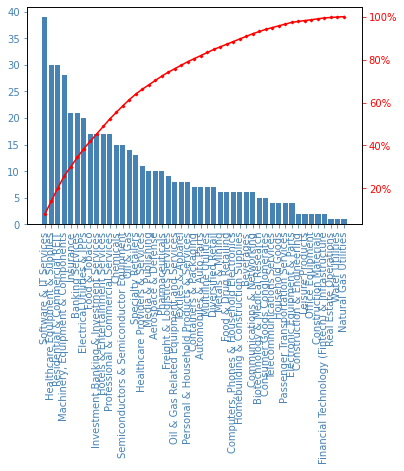

In [10]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

from matplotlib.pyplot import figure

#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 2

#create basic bar plot
fig, ax = plt.subplots()
ax.bar(IndustryCounts.index, IndustryCounts['industry'], color=color1)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(IndustryCounts.index, IndustryCounts['cumperc'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

#specify axis colors
ax.tick_params(axis='x', colors=color1,rotation=90)
ax2.tick_params(axis='x', colors=color2,rotation=90)

#display Pareto chart
plt.show()

In [11]:
df1['industry'] = df1['industry'].astype('category')

# Industrias Individuales (Individual Industries)
SoftwareIT = df1[df1.industry == 'Software & IT Services']
ResidentialCom = df1[df1.industry == 'Residential & Commercial REIT']
HealthCareEqSup = df1[df1.industry == 'Healthcare Equipment & Supplies']
MachineryEqCom = df1[df1.industry == 'Machinery, Equipment & Components']
Insurance = df1[df1.industry == 'Insurance']
BankingServices = df1[df1.industry == 'Banking Services']
ElectrucialUt = df1[df1.industry == 'Electrical Utilities & IPPs']
IB = df1[df1.industry == 'Investment Banking & Investment Services']
ProfessionalComSer = df1[df1.industry == 'Professional & Commercial Services']
FoodTabaco = df1[df1.industry == 'Food & Tobacco']

# Capitalizacion de Mercado (Market Cap)
LargeCap = df1[df1.marketcap == 'Large']
MidCap = df1[df1.marketcap == 'Mid']
SmallCap = df1[df1.marketcap == 'Small']

#dfs = [SoftwareIT, ResidentialCom, HealthCareEqSup, MachineryEqCom, Insurance, BankingServices, ElectrucialUt, IB, ProfessionalComSer, FoodTabaco]

# Industrias Paretianas
ParetoIndustries = df1[df1.industry.isin(selectedindustries)]
ParetoIndustries

,date,ticker,close,industry,marketcap
0,2018-01-02,A,68.9,Healthcare Equipment & Supplies,Not Found
1,2018-01-03,A,69.33,Healthcare Equipment & Supplies,Not Found
2,2018-01-04,A,70.1,Healthcare Equipment & Supplies,Not Found
3,2018-01-05,A,71.4,Healthcare Equipment & Supplies,Not Found
4,2018-01-08,A,72.28,Healthcare Equipment & Supplies,Not Found
...,...,...,...,...,...
490627,2021-12-29,XYL,122.9,"Machinery, Equipment & Components",Large
490628,2021-12-30,XYL,124.7,"Machinery, Equipment & Components",Large
490629,2021-12-31,XYL,122.08,"Machinery, Equipment & Components",Large
490630,2022-01-03,XYL,120.43,"Machinery, Equipment & Components",Large


In [12]:
#chosen_industries = input("Enter Specific Industry or all ParetoIndustries: ")

In [13]:
#hosen_industries.replace('"', "")
#rint(chosen_industries)

In [14]:
chosen = SoftwareIT.copy()

# https://stackoverflow.com/questions/44634885/grouping-by-unique-values-while-transposing-column
chosen = chosen.set_index(['date','ticker'])['close'].unstack()
chosen= chosen.copy().astype(float)
chosen = chosen.dropna(axis=1)
chosen

ticker,ACN,ADBE,ADP,ADSK,AKAM,ANSS,ATVI,CDNS,CDW,CRM,...,ORCL,PAYC,PYPL,ROP,SNPS,TWTR,TYL,V,VRSK,VRSN
date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,157.31,179.60,120.59,110.83,66.26,148.70,64.48,44.08,71.72,108.78,...,48.06,81.64,76.96,268.60,86.64,25.49,184.32,117.97,99.88,111.91
2018-01-03,158.83,187.54,122.72,113.20,68.33,155.60,66.56,43.77,75.20,109.75,...,48.31,84.71,76.90,268.36,90.22,25.15,185.79,117.43,98.28,115.30
2018-01-04,159.41,188.73,119.70,113.99,68.50,154.80,67.53,45.54,75.78,109.14,...,50.37,87.12,79.11,266.15,88.15,24.85,184.54,120.26,99.44,112.93
2018-01-05,162.13,193.90,123.50,111.19,66.09,157.34,69.54,45.57,74.81,110.00,...,49.50,87.86,82.50,277.58,90.57,25.14,190.88,124.78,97.52,116.00
2018-01-08,165.01,194.18,119.11,113.11,68.40,155.84,66.63,45.71,74.58,112.65,...,51.21,88.33,80.59,272.28,90.92,25.79,193.91,123.57,99.00,117.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-29,425.16,584.27,251.10,288.33,118.56,424.01,70.16,194.13,215.45,267.06,...,90.81,436.10,191.25,501.00,376.16,43.69,546.50,220.78,232.20,265.61
2021-12-30,414.68,592.62,250.57,291.21,117.95,408.44,70.84,192.08,204.02,266.85,...,88.52,418.00,192.24,498.75,383.04,45.93,542.50,222.19,237.85,260.27
2021-12-31,416.77,578.67,249.64,283.40,120.80,414.50,68.08,192.27,210.93,264.84,...,91.56,420.66,193.87,492.48,380.30,45.31,560.38,218.17,233.46,260.28


## Find Cointegrated Pairs for Selected Equities

In [15]:
# https://github.com/KidQuant/Pairs-Trading-With-Python/blob/master/PairsTrading.ipynb

import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

[('ACN', 'ORCL'), ('ADBE', 'ADSK'), ('ADBE', 'CRM'), ('ADBE', 'EBAY'), ('ADBE', 'FB'), ('ADBE', 'ROP'), ('ADSK', 'CRM'), ('ADSK', 'FB'), ('ADSK', 'NOW'), ('ADSK', 'PYPL'), ('AKAM', 'ANSS'), ('AKAM', 'MA'), ('AKAM', 'V'), ('ANSS', 'MA'), ('ANSS', 'TYL'), ('CDNS', 'SNPS'), ('CRM', 'EBAY'), ('CRM', 'FB'), ('CRM', 'NOW'), ('CRM', 'PAYC'), ('CRM', 'ROP'), ('CRM', 'SNPS'), ('CRM', 'VRSK'), ('EBAY', 'FB'), ('FB', 'TYL'), ('FTNT', 'ORCL'), ('GOOG', 'GOOGL'), ('GOOG', 'ORCL'), ('GOOGL', 'ORCL'), ('IBM', 'JKHY'), ('IBM', 'LDOS'), ('IBM', 'MA'), ('IBM', 'NLOK'), ('IBM', 'V'), ('IBM', 'VRSK'), ('IBM', 'VRSN'), ('MA', 'V'), ('MSFT', 'SNPS'), ('MSFT', 'TYL'), ('NLOK', 'NOW'), ('NLOK', 'ORCL'), ('NLOK', 'PAYC'), ('NLOK', 'PYPL'), ('NLOK', 'ROP'), ('NLOK', 'SNPS'), ('NLOK', 'TWTR'), ('NLOK', 'TYL'), ('NLOK', 'V'), ('NLOK', 'VRSK'), ('NLOK', 'VRSN'), ('SNPS', 'TYL')]


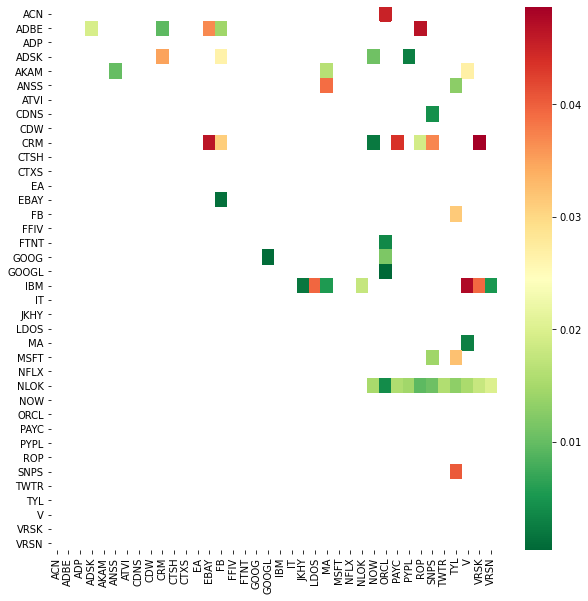

In [16]:
# Heatmap to show the p-values of the cointegration test between each pair of
# stocks. Only show the value in the upper-diagonal of the heatmap
scores, pvalues, pairs = find_cointegrated_pairs(chosen)
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(pvalues, xticklabels=list(chosen.columns), yticklabels=list(chosen.columns), cmap='RdYlGn_r' 
                , mask = (pvalues >= 0.05)
                )
print(pairs)

### Make Cointegrated Pairs Stationary

In [23]:
df = np.log(chosen).diff()
df = df.dropna(axis=0)
df

ticker,ACN,ADBE,ADP,ADSK,AKAM,ANSS,ATVI,CDNS,CDW,CRM,...,ORCL,PAYC,PYPL,ROP,SNPS,TWTR,TYL,V,VRSK,VRSN
date,,,,,,,,,,,,,,,,,,,,,
2018-01-03,0.009616,0.043260,0.017509,0.021159,0.030763,0.045358,0.031749,-0.007058,0.047382,0.008878,...,0.005188,0.036914,-0.000780,-0.000894,0.040490,-0.013428,0.007944,-0.004588,-0.016149,0.029842
2018-01-04,0.003645,0.006325,-0.024917,0.006955,0.002485,-0.005155,0.014468,0.039642,0.007683,-0.005574,...,0.041757,0.028053,0.028333,-0.008269,-0.023211,-0.012000,-0.006751,0.023814,0.011734,-0.020769
2018-01-05,0.016919,0.027025,0.031253,-0.024870,-0.035816,0.016275,0.029330,0.000659,-0.012883,0.007849,...,-0.017423,0.008458,0.041959,0.042049,0.027083,0.011602,0.033779,0.036896,-0.019497,0.026822
2018-01-08,0.017608,0.001443,-0.036194,0.017120,0.034355,-0.009579,-0.042747,0.003067,-0.003079,0.023805,...,0.033962,0.005335,-0.023424,-0.019278,0.003857,0.025527,0.015749,-0.009744,0.015062,0.013018
2018-01-09,-0.020944,-0.002991,0.045863,0.037822,0.030524,0.000770,0.026510,-0.005484,-0.004839,-0.005965,...,-0.011193,0.000226,-0.017398,0.023018,0.025411,-0.036325,-0.014493,-0.025656,-0.005673,-0.002897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-29,-0.010854,0.019216,-0.017880,-0.027098,-0.011072,-0.009576,0.026429,-0.019890,0.031352,0.036531,...,-0.017033,0.020245,-0.030637,0.013909,-0.020420,0.005048,0.000275,0.009329,-0.015130,0.002714
2021-12-30,-0.024958,0.014190,-0.002113,0.009939,-0.005158,-0.037412,0.009645,-0.010616,-0.054511,-0.000787,...,-0.025541,-0.042390,0.005163,-0.004501,0.018125,0.049999,-0.007346,0.006366,0.024041,-0.020310
2021-12-31,0.005027,-0.023821,-0.003718,-0.027185,0.023875,0.014728,-0.039740,0.000989,0.033308,-0.007561,...,0.033766,0.006343,0.008443,-0.012651,-0.007179,-0.013591,0.032427,-0.018258,-0.018629,0.000038


## Cointegrated Pairs with Their Respective Correlation Matrices

In [24]:
for a, b in pairs:
    print (df[[a, b]].corr(method ='pearson'))

ticker       ACN      ORCL
ticker                    
ACN     1.000000  0.230522
ORCL    0.230522  1.000000
ticker      ADBE      ADSK
ticker                    
ADBE    1.000000  0.431021
ADSK    0.431021  1.000000
ticker      ADBE       CRM
ticker                    
ADBE    1.000000  0.431494
CRM     0.431494  1.000000
ticker      ADBE      EBAY
ticker                    
ADBE    1.000000  0.216004
EBAY    0.216004  1.000000
ticker      ADBE        FB
ticker                    
ADBE    1.000000  0.346708
FB      0.346708  1.000000
ticker      ADBE       ROP
ticker                    
ADBE    1.000000  0.259792
ROP     0.259792  1.000000
ticker      ADSK       CRM
ticker                    
ADSK    1.000000  0.358448
CRM     0.358448  1.000000
ticker      ADSK        FB
ticker                    
ADSK    1.000000  0.332437
FB      0.332437  1.000000
ticker      ADSK       NOW
ticker                    
ADSK    1.000000  0.412533
NOW     0.412533  1.000000
ticker      ADSK      PYPL
t

### DataFrame with only cointegrated equities

In [25]:
pairsdf = pd.DataFrame(pairs)
pair0 = list(pairsdf[0].unique())
pair1 = list(pairsdf[1].unique())

# https://www.geeksforgeeks.org/python-union-two-lists/

# Union of lists without repetition 
def Union(lst1, lst2):
    final_list = list(set(lst1) | set(lst2))
    return final_list

unionlist = Union(pair0, pair1)

df = df[unionlist]
df

ticker,ADBE,VRSK,FTNT,CDNS,VRSN,EBAY,CRM,TWTR,TYL,V,...,ANSS,ACN,JKHY,PYPL,NOW,PAYC,ORCL,LDOS,SNPS,NLOK
date,,,,,,,,,,,,,,,,,,,,,
2018-01-03,0.043260,-0.016149,0.056094,-0.007058,0.029842,0.036256,0.008878,-0.013428,0.007944,-0.004588,...,0.045358,0.009616,-0.035185,-0.000780,0.036338,0.036914,0.005188,0.004233,0.040490,-0.005450
2018-01-04,0.006325,0.011734,-0.020016,0.039642,-0.020769,-0.025910,-0.005574,-0.012000,-0.006751,0.023814,...,-0.005155,0.003645,0.051315,0.028333,-0.009581,0.028053,0.041757,-0.016429,-0.023211,0.030606
2018-01-05,0.027025,-0.019497,-0.042182,0.000659,0.026822,0.022393,0.007849,0.011602,0.033779,0.036896,...,0.016275,0.016919,-0.025618,0.041959,0.003277,0.008458,-0.017423,0.006726,0.027083,0.005615
2018-01-08,0.001443,0.015062,0.042182,0.003067,0.013018,0.004018,0.023805,0.025527,0.015749,-0.009744,...,-0.009579,0.017608,0.001160,-0.023424,0.002469,0.005335,0.033962,0.033703,0.003857,-0.016941
2018-01-09,-0.002991,-0.005673,-0.016660,-0.005484,-0.002897,0.025487,-0.005965,-0.036325,-0.014493,-0.025656,...,0.000770,-0.020944,0.050933,-0.017398,-0.006548,0.000226,-0.011193,0.023006,0.025411,0.012319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-29,0.019216,-0.015130,-0.006988,-0.019890,0.002714,-0.030216,0.036531,0.005048,0.000275,0.009329,...,-0.009576,-0.010854,-0.014182,-0.030637,-0.030820,0.020245,-0.017033,-0.003353,-0.020420,0.014676
2021-12-30,0.014190,0.024041,-0.052857,-0.010616,-0.020310,0.028336,-0.000787,0.049999,-0.007346,0.006366,...,-0.037412,-0.024958,0.010873,0.005163,-0.013307,-0.042390,-0.025541,-0.021023,0.018125,0.008555
2021-12-31,-0.023821,-0.018629,0.016784,0.000989,0.000038,-0.002609,-0.007561,-0.013591,0.032427,-0.018258,...,0.014728,0.005027,0.010814,0.008443,0.037419,0.006343,0.033766,0.025456,-0.007179,-0.000370


### Person Correlation Matrix with Stationary Cointegrated Series

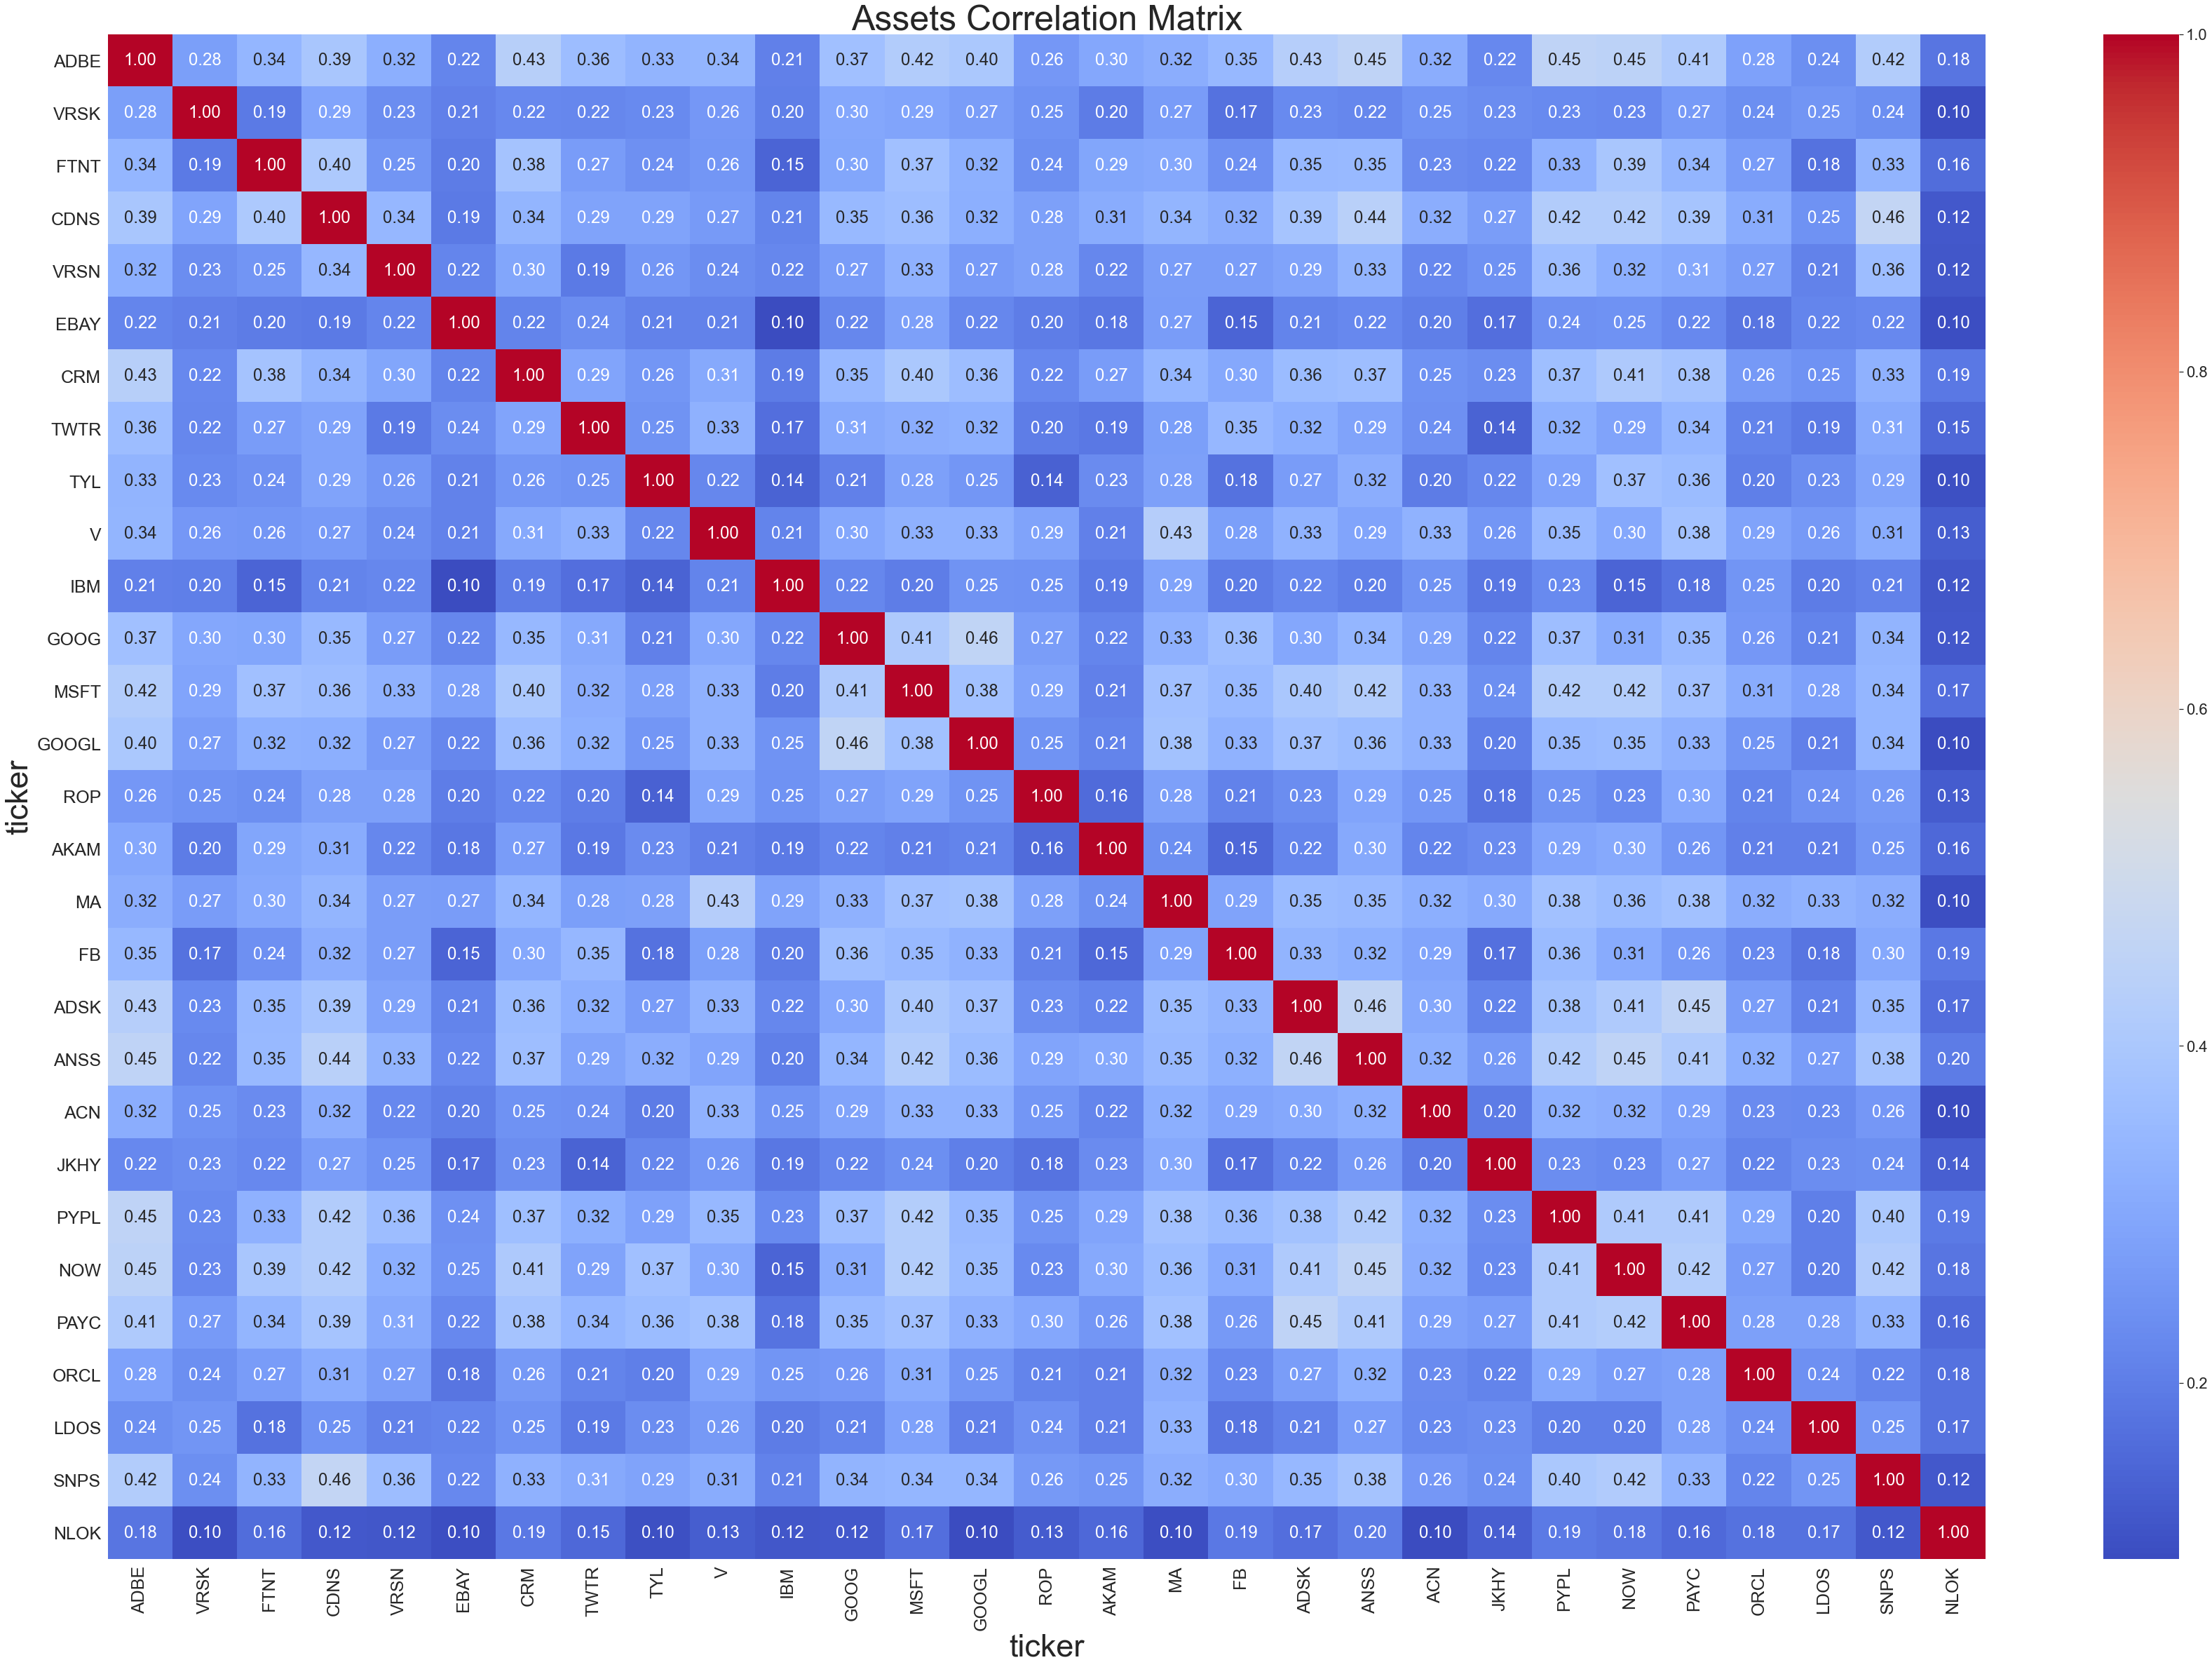

In [26]:
# Pearson correlation to get the basic idea about the relationship
fig, ax = plt.subplots(figsize=(60,40))
plt.xticks(rotation='vertical')
plt.yticks(rotation='vertical')
plt.xlabel('xlabel', fontsize=45)
plt.ylabel('ylabel', fontsize=45)
sns.heatmap(df.corr(method ='pearson'), ax=ax, cmap='coolwarm', annot=True, fmt=".2f") # Pearson
sns.set(font_scale=2)
ax.set_title('Assets Correlation Matrix').set_size(50)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(25)

### Correlated Pairs (Only those that are cointegrated should be considered for pair trading)

In [27]:
# https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
    
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_pearson_correlations(df, n=5):
    au_corr = df.corr(method ='pearson').unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Pearson Correlations")
print(get_top_pearson_correlations(df, 30)) # Top 30

Top Pearson Correlations
ticker  ticker
CDNS    SNPS      0.463648
ADSK    ANSS      0.462039
GOOG    GOOGL     0.457745
ADBE    ANSS      0.453946
        PYPL      0.453470
ADSK    PAYC      0.452749
ANSS    NOW       0.452444
ADBE    NOW       0.448365
CDNS    ANSS      0.436848
ADBE    CRM       0.431494
        ADSK      0.431021
V       MA        0.427148
MSFT    PYPL      0.423882
NOW     PAYC      0.422301
MSFT    NOW       0.420860
ANSS    PYPL      0.419173
MSFT    ANSS      0.418946
CDNS    PYPL      0.418336
ADBE    MSFT      0.418110
CDNS    NOW       0.417812
ADBE    SNPS      0.417531
NOW     SNPS      0.416753
ADSK    NOW       0.412533
ANSS    PAYC      0.412210
PYPL    NOW       0.412111
        PAYC      0.412079
ADBE    PAYC      0.410771
CRM     NOW       0.408970
GOOG    MSFT      0.406608
FTNT    CDNS      0.404030
dtype: float64


# Pairs Trading

In [28]:
t1='CDNS'
t2='SNPS'
S1 = chosen[t1]
S2 = chosen[t2]

score, pvalue, _ = coint(S1, S2)
pvalue

0.004326355837773983

### Spread

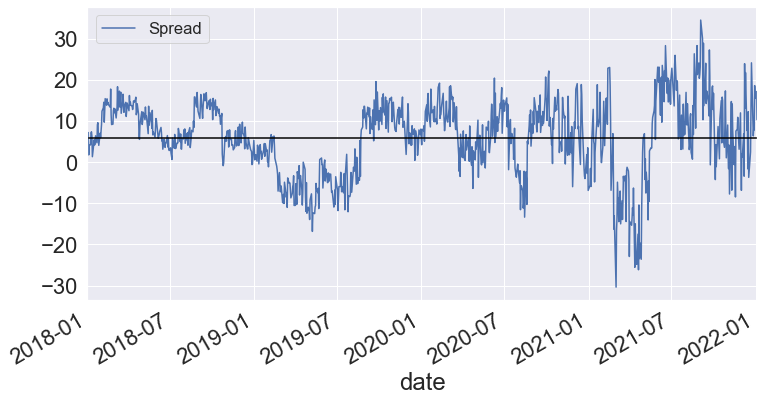

In [29]:
S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()
S1 = S1[t1]
b = results.params[t1]

spread = S2 - b * S1
spread.plot(figsize=(12,6))

sns.set(font_scale=1.5)

plt.axhline(spread.mean(), color='black')
plt.xlim(start, end)
plt.legend(['Spread']);

" when we difference time series, we inevitably incur loss of important longrun information. This is another problem on its own. Hence the need to carry out cointegration test. The aim of cointegration is to find out if a linear combination of non-stationary variables is stationary. If cointegration exists between two variables that share similar non-stationary properties, then regression can proceed without generating spurious results. The implication of cointegration is that deviation may occur among the variables but that's temporary as equilibrium holds in the longrun for them. Thus the presence of cointegration between two variables that share similar non-stationary properties implies that consistent estimate of longrun coefficient is evident. "

#https://www.researchgate.net/post/cointegration_and_stationary_what_are_they_doing

### Ratio

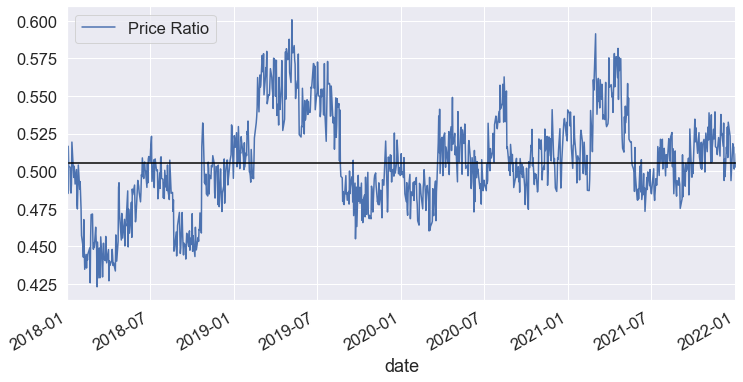

In [30]:
ratio = S1/S2
ratio.plot(figsize=(12,6))
plt.axhline(ratio.mean(), color='black')
plt.xlim(start, end)
plt.legend(['Price Ratio']);

### Train/Test Split

In [31]:
ratios = S1 / S2 
tts = round(len(ratios) * .70 )

In [32]:
train = ratios[:tts]
test = ratios[tts:]

In [33]:
train

date
2018-01-02    0.508772
2018-01-03    0.485147
2018-01-04    0.516619
2018-01-05    0.503147
2018-01-08    0.502750
                ...   
2020-10-15    0.503603
2020-10-16    0.508992
2020-10-19    0.491137
2020-10-20    0.498558
2020-10-21    0.496675
Length: 707, dtype: float64

In [34]:
test

date
2020-10-22    0.495490
2020-10-23    0.497925
2020-10-26    0.486257
2020-10-27    0.488209
2020-10-28    0.499431
                ...   
2021-12-29    0.516084
2021-12-30    0.501462
2021-12-31    0.505575
2022-01-03    0.502646
2022-01-04    0.511744
Length: 303, dtype: float64

## Setting Moving Averages on Equity Ratio

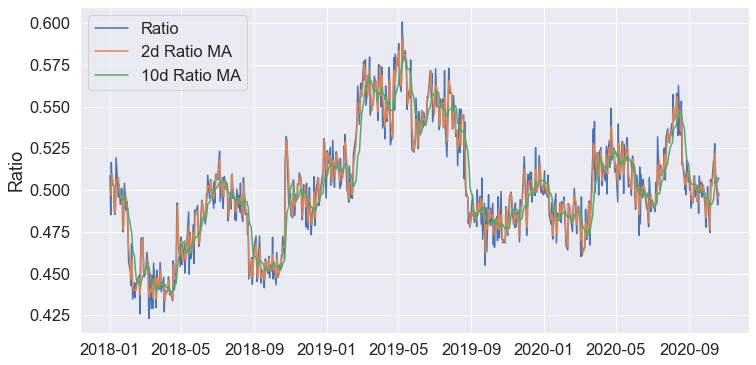

In [41]:
# Set Moving Averages
Base = 2
Top = 10

ratios_mavgBase = train.rolling(window=Base, center=False).mean()
ratios_mavgTop = train.rolling(window=Top, center=False).mean()

std_Top = train.rolling(window=Top, center=False).std() # Standrd Devisation
zscore_Top_Base = (ratios_mavgBase - ratios_mavgTop)/std_Top # Z Score (Standarized Resturns Ratio)

# Moving Averages Equity Ratio
plt.figure(figsize=(12, 6))
plt.plot(train.index, train.values)
plt.plot(ratios_mavgBase.index, ratios_mavgBase.values)
plt.plot(ratios_mavgTop.index, ratios_mavgTop.values)
plt.legend(['Ratio', '2d Ratio MA', '10d Ratio MA'])

plt.ylabel('Ratio')
plt.show()

## Z-Score plot with Upper/Lower Bounds (standard deviations)

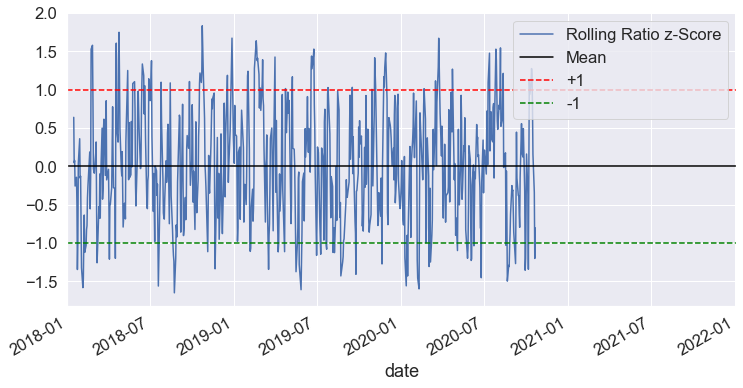

In [36]:
plt.figure(figsize=(12,6))
zscore_Top_Base.plot()
plt.xlim(start, end)
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

## Equity Ratio Buy/Sell Signails on Training Set

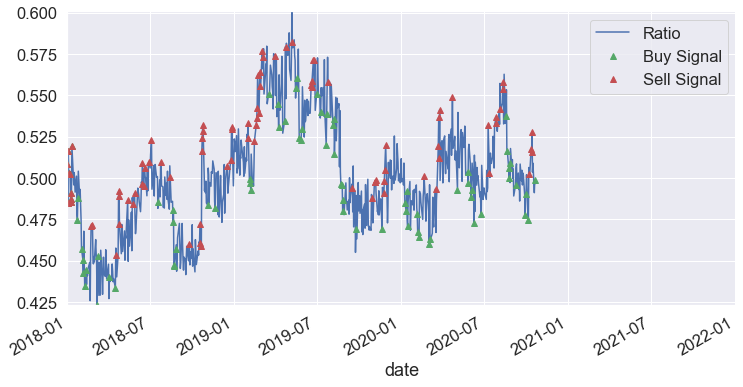

In [37]:
plt.figure(figsize=(12,6))

train.plot()
buy = train.copy()
sell = train.copy()
buy[zscore_Top_Base>-1] = 0
sell[zscore_Top_Base<1] = 0
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratios.min(), ratios.max()))
plt.xlim(start,end)
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

## Buy/Sell Signails for Cointegrated Equity Pair on Training Set

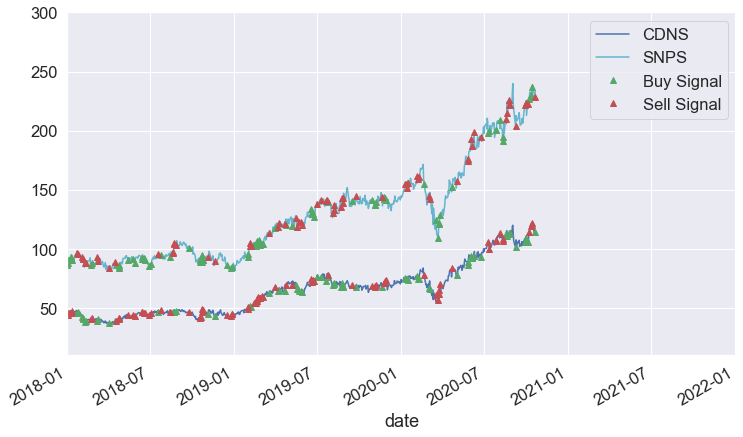

In [40]:
plt.figure(figsize=(12,7))
S1 = chosen[t1].iloc[:tts]
S2 = chosen[t2].iloc[:tts]

S1.plot(color='b')
S2.plot(color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()

# When you buy the ratio, you buy stock S1 and sell S2
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]

# When you sell the ratio, you sell stock S1 and buy S2
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]

buyR.plot(color='g', linestyle='None', marker='^')
sellR.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, min(S1.min(), S2.min()), max(S1.max(), S2.max())))
plt.ylim(10, 300)
plt.xlim(start, end)

plt.legend([t1, t2, 'Buy Signal', 'Sell Signal'])
plt.show()

# Strategy results on Testing Set

## Additional Money Made From Arbitrge Pair Startegy

In [39]:
# Trade using a simple strategy
def trade(S1, S2, window1, window2):
    
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    
    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std
    
    # Simulate trading
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    for i in range(len(ratios)):
        # Sell short if the z-score is > 1
        if zscore[i] < -1:
            money += S1[i] - S2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
            #print('Selling Ratio %s %s %s %s'%(money, ratios[i], countS1,countS2))
        # Buy long if the z-score is < -1
        elif zscore[i] > 1:
            money -= S1[i] - S2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]
            #print('Buying Ratio %s %s %s %s'%(money,ratios[i], countS1,countS2))
        # Clear positions if the z-score between -.5 and .5
        elif abs(zscore[i]) < 0.75:
            money += S1[i] * countS1 + S2[i] * countS2
            countS1 = 0
            countS2 = 0
            #print('Exit pos %s %s %s %s'%(money,ratios[i], countS1,countS2))
            
            
    return money

trade(chosen[t1].iloc[tts:], chosen[t2].iloc[tts:], Top, Base)

535.9250045206745